# RANSAC

In [1]:
#import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from skimage.measure import LineModelND, ransac

#### Reading the data

In [2]:
#TODO read point from txt
file = open('data_set_0_.txt')

In [3]:
#parsing the file
points=[]
for i in file:
    point = i.rstrip().split(',')
    x = float(point[0])
    y = float(point[1])
    z = float(point[2])
    points.append([x, y, z])

In [5]:
#convert to numpy array
points = np.array(points)
points.reshape(-1,3)

array([[-5.28944e-01,  2.82669e+00, -4.79725e-01],
       [ 5.40413e-01,  1.13827e+00, -3.51901e+00],
       [ 3.28047e-01,  2.28142e-02, -1.39114e-02],
       [ 9.89472e-01, -1.97240e+00,  7.97996e-03],
       [ 3.24180e-01,  5.23614e-01, -9.92309e-01],
       [ 8.44169e-01, -4.98294e-01, -2.06843e+00],
       [ 2.06765e+00, -2.46345e+00, -5.47900e+00],
       [-8.65333e-01,  4.33328e+00, -1.47455e+00],
       [-1.14161e+00,  6.72418e+00, -4.59871e+00],
       [ 1.78103e+00, -2.17858e+00, -4.32903e+00],
       [ 8.22741e-01, -4.09803e-01, -2.11684e+00],
       [ 2.04998e+00, -3.38705e+00, -3.52576e+00],
       [ 1.73091e+00, -4.16073e+00, -6.39995e-02],
       [ 2.50725e+00, -6.43053e+00, -1.82442e-01],
       [-1.26744e+00,  5.94996e+00, -2.29531e+00],
       [ 2.14636e+00, -1.54540e+00, -7.78737e+00],
       [-2.51588e+00,  9.45369e+00, -1.81209e+00],
       [ 8.04705e-01, -1.01720e+00, -7.93833e-01],
       [ 9.30567e-01, -1.80117e+00,  1.89337e-02],
       [ 1.92326e+00, -2.00032e

#### Visualizing data
this step will help to get an intiution <br />
what is the shape of data ?<br />
what type of model to use?

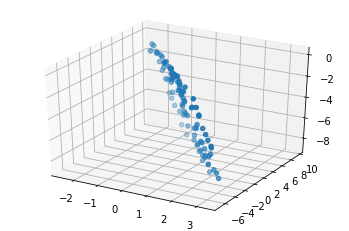

In [6]:
#plot data in 3D [1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0],points[:,1],points[:,2])

from the plot it seems like a line <br />
let's make the data into a numpy array to use RANSAC model


#### Model
i used ransac class from skimage

In [7]:
# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(points, LineModelND, min_samples=2,residual_threshold=1, max_trials=1000)
#inliers is list of Boolean (True or False). inlier points are true, outliers are false

#make another list of outliers
outliers = inliers == False

#### plot the inliers and the outliers

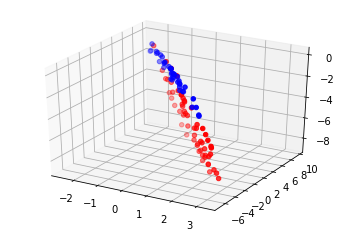

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[inliers][:,0],points[inliers][:,1],points[inliers][:,2], c = 'b')
ax.scatter(points[outliers][:,0],points[outliers][:,1],points[outliers][:,2], c='r')

Try different thershold value

In [9]:
# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(points, LineModelND, min_samples=2,residual_threshold=2, max_trials=1000)
#inliers is list of Boolean (True or False). inlier points are true, outliers are false

#make another list of outliers
outliers = inliers == False

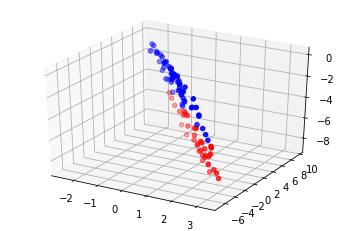

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[inliers][:,0],points[inliers][:,1],points[inliers][:,2], c = 'b')
ax.scatter(points[outliers][:,0],points[outliers][:,1],points[outliers][:,2], c='r')

## conclusion
my minimal sampleset size is 2, "The reason why the minimal number of data points is usually used is because it increases the likelihood of drawing a sample set that has no outliers."[2] <br />
the threshold by trail i concluded that 2 is a good value for our model
the number of iteration can be smaller than chosen one, but the dataset is not that big so 1000 is chosen as max number of iterations

#### Resources
[1]https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html<br />
[2] https://stats.stackexchange.com/questions/322812/ransac-should-we-always-sample-with-the-minimal-number-of-data-points <br />
https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/vcalc/lineplane/lineplane.html<br />
https://scikit-image.org/docs/dev/auto_examples/transform/plot_ransac.html<br />
https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.ndarray.html<br />
https://stackoverflow.com/questions/34972142/sklearn-logistic-regression-valueerror-found-array-with-dim-3-estimator-expec<br />
https://www.programcreek.com/python/example/75200/sklearn.linear_model.RANSACRegressor <br />
https://stackoverflow.com/questions/35070178/fit-plane-to-a-set-of-points-in-3d-scipy-optimize-minimize-vs-scipy-linalg-lsts?rq=1